# Chap02 - 자연어와 단어의 분산 표현

## 2.1 자연어 처리란

- 한국어와 영어 등 우리가 평소에 쓰는 말을 **자연어**(natural language)라고 한다.

- 자연어처리(**NLP**, Natural Language Processing)은 '우리의 말을 컴퓨터에게 이해시키기 위한 기술(분야)'를 의미한다.

### 단어의 의미
- 단어 : 의미의 최소 단위
- 단어의 의미를 컴퓨터에게 이해 시키는 방법
    - 시소러스를 활용한 기법
    - 통계 기반 기법
    - 추론 기반 기법 (다음 장, word2vec)

## 2.2 시소러스(Thesaurus)

- 시소러스는 유의어 사전으로, '뜻이 같은 단어(동의어)'나 '뜻이 비슷한 단어(유의어)'가 한 그룹으로 분류되어 있다.

<img src='./deep_learning_2_images/fig 2-1.png' width=800>

- 단어 사이의 '상하와 하위' 혹은 '전체와 부분' 등 더 세세하게 정의해 두기도 한다.

<img src='./deep_learning_2_images/fig 2-2.png' width=800>

## WordNet
- 대표적인 시소러스로는 'WordNet'이 있다.
- 1985년 프린스턴 대학에서 구축을 시작
- 유의어를 얻거나,'단어 네트워크' 이용 단어간의 유사도 계산

### 시소러스 문제점

- 시대 변화에 대응하기 어렵다.
    - 신조어, 단어의 의미 변화 등
    
    
- 사람을 쓰는 비용이 크다.

- 단어의 미묘한 차이를 표헌할 수 없다.

## 2.3 통계 기반 기법

- **말뭉치(corpus)** : 대량의 텍스트 데이터를 의미하며, NLP나 애플리케이션을 염두에 두고 수집된 텍스트 데이터를 말한다.

- 통계 기반 기법의 목표는 말뭉치(corpus)에서 자동으로, 그리고 효율적으로 핵심을 추출하는 것이다.

### 2.3.1 파이썬으로 말뭉치 전처리하기

- 전처리
    - 텍스트 데이터를 단어로 분할
    - 단어에 ID를 부여하고, ID의 리스트로 이용할 수 있도록 해준다.
    - 딕셔너리를 이용해 단어 ID와 단어를 매핑한다.

In [1]:
text = 'You say goodbye and I say hello.'

text = text.lower()
text = text.replace('.', ' .')
text

'you say goodbye and i say hello .'

In [2]:
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

- 정규 표현식

In [7]:
import re

words = re.split(r'(\W+)', text) # 비알파벳 문자(알파벳이 아닌 문자)를 나타내며, +는 하나 이상의 연속된 비알파벳 문자를 의미
words = [word for word in words if word.strip()]  # 공백이 아닌 요소만 선택
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', ' .']

- 단어에서 단어 ID로의 변환

In [14]:
word_to_id = {}

for word in words:
    if word not in word_to_id:
        new_id =  len(word_to_id)
        word_to_id[word] = new_id
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, ' .': 6}

- 단어 ID에서 단어로의 변환

In [15]:
id_to_word = {id_: word for word, id_ in word_to_id.items()}
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: ' .'}

- 위의 딕셔너리를 사용해, 단어 ID를 검색하거나, 반대로 단어 ID를 가지고 단어를 검색할 수 있다.

In [16]:
id_to_word[1]

'say'

In [17]:
word_to_id['hello']

5

- 단어 목록 -> 단어 ID 목록으로 변경

In [18]:
import numpy as np

corpus = [word_to_id[word] for word in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [25]:
# common/util.py -> preprocess 메서드 사용
import sys
sys.path.append('..')
from common.util import preprocess

def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')
    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
    
    corpus = np.array([word_to_id[w] for w in words])
    return corpus, word_to_id, id_to_word

In [26]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

In [27]:
corpus, word_to_id, id_to_word

(array([0, 1, 2, 3, 4, 1, 5, 6]),
 {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6},
 {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'})

### 2.3.2 단어의 분산 표현

- 단어의 분산 표현(distributional representation)은 단어를 고정 길이의 밀집 벡터(dense vector)로 표현한다.

- 밀집 벡터는 대부분의 원소가 0이 아닌 실수로 이루어진 벡터를 말한다.

### 2.3.3 분포 가설(Distributional Hypothesis)

> 단어의 의미는 주변 단어에 의해 형성 된다.

- 단어 자체에는 의미가 없고, 그 단어가 사용된 맥락(또는 문맥, context)이 해당 단어의 의미를 형성한다.

```
I drik beer. We drink wine.

I guzzle beer. We guzzle wine.
```

- 위의 예시에서 'drink'와 'guzzle'(폭음하다)의 주변 단어(context)인 'beer, wine'을 통해, 
- 'drink, guzzle'이 비슷한 의미를 가지는 단어라고 짐작할 수 있다.

#### Window-based Context

- 맥락(context)는 특정 단어를 중심에 둔 그 주변 단어를 말한다.

- 맥락의 크기를 window size 라고 한다.

- 일반적으로, 좌우로 똑같은 수의 단어를 맥락으로 사용하지만, 경우에 따라 왼쪽, 오른쪽만 사용할 수 있다.

![](./images/window_size.png)

<img src = './deep_learning_2_images/fig 2-3.png' width=500>

### 2.3.4 동시발생 행렬(Co-occurrence Matrix)

- 주변 단어를 '세어 보는(counting)' 방법

- 특정 단어에 대해, 그 단어의 주변에 어떤 단어가 몇 번이나 등장하는지 카운팅하여 합치는 방법

In [28]:
import sys
sys.path.append('..')
import numpy as np
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(f'corpus: {corpus}')
print(f'id_to_word: {id_to_word}')

corpus: [0 1 2 3 4 1 5 6]
id_to_word: {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


- 위 결과,단어의 수가 총 7개
- 각 단어의 맥락에 해당하는 단어의 빈도 수 카운팅
- 윈도우 크기는 1, 단어 ID가 0 인 'you' 부터 시작

<img src = './deep_learning_2_images/fig 2-4.png' width=500>


<img src = './deep_learning_2_images/fig 2-5.png' width=500>

- 'you'의 맥락은 'say'라는 단어 한개 뿐

<img src = './deep_learning_2_images/fig 2-6.png' width=500>

#### Co-occurrence Matrix 생성

- `window size = 1`로 설정할 경우

<img src = './deep_learning_2_images/fig 2-7.png' width=500>

- 위 표의 각 행은 해당 단어를 표현한 벡터
- 이 표가 행렬의 현태를 띈다는 뜻에서 동시발생 행렬 이라고 한다.

In [29]:
C = np.array([[0, 1, 0, 0, 0, 0, 0], 
              [1, 0, 1, 0, 1, 1, 0], 
              [0, 1, 0, 1, 0, 0, 0], 
              [0, 0, 1, 0, 1, 0, 0], 
              [0, 1, 0, 1, 0, 0, 0], 
              [0, 1, 0, 0, 0, 0, 1], 
              [0, 0, 0, 0, 0, 1, 0]], dtype=np.int32)

In [30]:
# ID가 0인 단어의 벡터 표현
print(C[0])
# ID가 4인 단어의 벡터 표현
print(C[4])

# "goodbye"의 벡터 표현
print(C[word_to_id['goodbye']])

[0 1 0 0 0 0 0]
[0 1 0 1 0 0 0]
[0 1 0 1 0 0 0]


- 동시발생행렬을 이용, 단어를 벡터로 나타낼 수 있다.
- 동시발생행렬을 말뭉치로 부터 자동 생성

In [31]:
# common/util.py
def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32) # 행렬 초기화
    
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i  # left window_size
            right_idx = idx + i  # right window_size

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
                
    return co_matrix

In [32]:
window_size = 1
vocab_size = len(id_to_word)

C = create_co_matrix(corpus, vocab_size, window_size=1)
C

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]], dtype=int32)

### 2.3.5 벡터 간 유사도

- 벡터 간의 유사도를 측정하는 방법은 다양하다(e.g. 유클리드 거리, 맨하탄 거리 등)

- 단어 벡터의 유사도를 나타낼 때는 **코사인 유사도**(cosine similarity)를 자주 사용한다.

- 두 벡터 $\mathbf{x} = (x_1, x_2, \dots, x_n)$과 $\mathbf{y}=(y_1, y_2, \dots, y_n)$ 에 대하여 코사인 유사도는 다음과 같다.

$$
\text{similarity}(\mathbf{x}, \mathbf{y}) = \frac{\mathbf{x} \cdot \mathbf{y}}{\| \mathbf{x} \| \| \mathbf{y} \|} = \frac{x_1 y_1 + \cdots + x_n y_n}{\sqrt{x_{1}^{2} + \cdots + x_n^{2}} \sqrt{y_1^{2} + \cdots + y_n^{2}}}
$$

- 위 식에서 분자에는 벡터의 내적, 분모에는 각 벡터의 노름(norm)이 등장한다.

- 즉, 벡터를 정규화하고 내적을 구하는 것이라고 볼 수 있다.

- 코사인 유사도를 직관적으로 보면, '두 벡터가 가리키는 방향이 얼마나 비슷한가' 이다. 
- 두 방향이 완전히 같다면 1, 반대면 -1 이 된다.

In [33]:
def cos_similarity(x, y, eps=1e-8):
    # epsilon 값을 추가해, 
    # 0으로 나누기 오류가 나는 것을 막아줌
    nx = x / np.sqrt(np.sum(x**2) + eps)  # x의 정규화
    ny = y / np.sqrt(np.sum(y**2) + eps)  # y의 정규화
    return np.dot(nx, ny)

In [34]:
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']]  # "you"의 단어 벡터
c1 = C[word_to_id['i']]  # 'i'의 단어 벡터
print(cos_similarity(c0, c1))

0.7071067758832467


### 2.3.6 유사 단어의 랭킹 표시

- 검색어와 비슷한 단어를 유사도 순으로 출력하는 함수인 `most_similar()` 구현
1. 검색어의 단어 벡터를 꺼낸다.
2. 검색어의 단어 벡터와 다른 모든 단어 벡터와의 코사인 유사도를 각각 구한다.
3. 계산한 코사인 유사도 결과를 기준으로 값이 높은 순서대로 출력한다.

In [35]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    # 1) 검색어를 꺼낸다.
    if query not in word_to_id:
        print(f'{query}(을)를 찾을 수 없습니다.')
        return 
    
    print(f'\n[query] {query}')
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]
    
    # 2) 코사인 유사도 계산
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)
        
    # 3) 코사인 유사도를 기준으로 내림차순으로 출력
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query: # 자기 자신 패스
            continue
        print(f' {id_to_word[i]}: {similarity[i]}')
        
        count +=1
        if count >= top:
            return

In [38]:
# numpy의 artsort() 예시
# 오름차순
x = np.array([100, -20, 2])
x.argsort()

array([1, 2, 0])

In [39]:
# 내림차순
(-x).argsort()

array([0, 2, 1])

In [37]:
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, most_similar

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067758832467
 i: 0.7071067758832467
 hello: 0.7071067758832467
 say: 0.0
 and: 0.0


## 2.4 통계 기반 기법 개선하기

### 2.4.1 상호정보량 (Pointwise Mutual Information)

- 동시발생 행렬의 원소는 두 단어가 동시에 발생한 횟수
- 그러나 이 '발생' 횟수라는 것은 사실 그리 좋은 특성이 아님
- 예를 들어, Corpus에서 `the`와 `car`의 동시발생(co-occurrence)를 보면, `... the car ...`라는 문구가 많이 나타날 것
- `the`와 `car`의 관련성 보다 `car`와 `drive`의 관련성이 더 높지만, 
- 동시발생 횟수로만 본다면 `the`와 `car`의 관련성이 높게 나타남.
- 이러한 문제를 해결하기 위해 **점별 상호정보량**(PMI, Pointwise Mutual Information)을 사용
- PMI는 두 확률변수 $x$와 $y$에 대해 다음의 식처럼 정의

$$
\text{PMI} (x, y) = \log_{2}{\frac{P(x,y)}{P(x)P(y)}}
$$

- $P(x)$ : $x$가 일어날 확률
- $P(y)$ : $y$가 일어날 확률
- $P(x,y)$ : $x$와 $y$가 동시에 일어날 확률


- `the`와 `car`가 동시에 일어날 확률과 `car`와 `drive`가 동시에 일어날 확률이 같다 하더라도
- `the`가 일어날 확률이 `drive`가 일어날 확률보다 더 크면, 
-  `car`와 `drive` PMI값이 더 높아,  `car`와 `drive`간에 관련성이 높다는 의미

위의 식을 Co-occurrence Matrix를 이용해 다시 써보면,

$$
\text{PMI}(x, y) = \log_{2}{\frac{P(x,y)}{P(x)P(y)}}
= \log_{2}{\frac{\frac{C(x,y)}{N}}{\frac{C(x)}{N} \frac{C(y)}{N}}}
= \log_{2}{\frac{C(x,y)\cdot N}{C(x)C(y)}}
$$

- $C$ : Co-occurrence Matrix
- $C(x,y)$ : 단어 $x$와 $y$가 동시발생하는 횟수
- $C(x), C(y)$ : $x$와 $y$의 등장횟수
- $N$ : Corpus에 포함된 단어 수

#### PPMI

- 만약, 두 안어의 동시발생 횟수가 $0$일 경우, $\log_{2}{0} = -\infty$ 가 되는 문제가 발생
- 이를 피하기 위해 **양의 상호정보량**(PPMI, Positive PMI)를 사용

$$
\text{PPMI}(x, y) = \max(0, \text{PMI}(x, y))
$$

- 음수일 경우 0으로 취급

In [40]:
# common/util.py
def ppmi(C, verbose=False, eps=1e-8):
    '''PPMI(점별 상호정보량) 생성
    :param C: 동시발생 행렬
    :param verbose: 진행 상황을 출력할지 여부
    :return: ppmi
    '''
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)  # num of corpus
    S = np.sum(C, axis=0)  # 각 단어의 출현 횟수
    total = C.shape[0] * C.shape[1]
    cnt = 0
    
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[i]*S[j]) + eps)
            M[i, j] = max(0, pmi)
            
            if verbose:
                cnt += 1
                if cnt % (total//100) == 0:
                    print(f'{(100*cnt/total):.2f} 완료')
    return M

- numpy sum의 axis 매개변수 기본값은 None
- 이 기본값을 사용할 경우 전체 배열의 모든 요소를 더하게 됩니다

In [54]:
np.sum(C)

14

In [55]:
np.sum(C, axis=0)

array([1, 4, 2, 2, 2, 2, 1])

- pandas의 sum은 axis의 기본 값이 0
- 이 기본 값을 사용할 경우 DataFrame의 열 방향으로 합하게 됩니다.
- axis=0 축이 사라진 결과가 나옴

In [59]:
list('ABCD')

['A', 'B', 'C', 'D']

In [60]:
import pandas as pd

df = pd.DataFrame(np.arange(16).reshape(4, -1), columns=list('ABCD'))
display(df)
df.sum(), df.sum(axis=0)

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


(A    24
 B    28
 C    32
 D    36
 dtype: int64,
 A    24
 B    28
 C    32
 D    36
 dtype: int64)

In [41]:
import sys
sys.path.append('..')
import numpy as np
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3)  # 유효 자릿수를 세 자리로 표시
print('Co-occurrence Matrix')
print(C)
print('-'*50)
print('PPMI')
print(W)

Co-occurrence Matrix
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


In [61]:
from common.util import most_similar
most_similar('you', word_to_id, id_to_word, W, top=5)


[query] you
 goodbye: 0.40786147117614746
 i: 0.40786147117614746
 hello: 0.2763834297657013
 say: 0.0
 and: 0.0


 - PPMI 행렬의 문제점
     - 말뭉치의 어휘 수가 증가하면 각 단어 벡터의 차원수 증가
     - 희소 함 (대부분의 원소가 0)
     - 각 원소의 중요도가 낮다
     - 노이즈에 약하고 견고하지 못하다

### 2.4.2 차원 축소(Dimensionality Reduction)

- 차원 축소는 '중요한 정보'는 최대한 유지하면서 줄이는 것이 핵심이다.

<img src = './deep_learning_2_images/fig 2-8.png' width=500>

- 오른쪽은 새로운 축을 도입, 똑같은 데이터를 좌표측 하나만으료 표시
- 새로운 축을 찾을 때는 넓게 분포 되도록 고려 해야
- 차원 감소 효과로 희소행렬이 밀집 벡터로 변환 됨

#### 특이값분해(SVD, Singular Value Decomposition)


$$
\mathbf{X} = \mathbf{U \Sigma V}^{T}
$$


![](./images/svd.png)

- $\mathbf{U}$과 $\mathbf{V}$는 직교행렬이며, 그 열벡터는 서로 직교한다. 
    - Orthogonal Matrix는 정방행렬로 이것의 열과 행들은 Orthogonal (직교) 단위 벡터가 된다. 
    - 즉, Orthonormal Vector가 되는 것이다. 이것은 아래와 같은 관계를 가지면 된다.
    - $\mathbf{U}\mathbf{U}^T$ = $\mathbf{U}^T\mathbf{U}$ = $\mathbf{I}$
    - $\mathbf{U}^T$ = $\mathbf{U}^{-1}$
- 이러한 직교행렬은 어떠한 공간의 축(기저)을 형성한다. 
- 따라서 이러한 $\mathbf{U}$행렬을 '단어 공간'이라고 취급할 수 있다. 
- $\mathbf{\Sigma}$는 대각행렬이며, 
    - 대각행렬 : 대각성분 외에는 모두 0인 행렬
- 특이값(singular value)이 큰 순서로 나열되어 있다. 
- 특이값이란, '해당 축'의 중요도라고 볼 수 있으며, 이 특이값을 기준으로 덜 중요한 축을 제외할 수 있다.

<img src = './deep_learning_2_images/fig 2-9.png' width=500>

- '단어의 PPMI 행렬'에 적용

<img src = './deep_learning_2_images/fig 2-10.png' width=500>

- 행렬  $\mathbf{\Sigma}$ 에서 특잇값이 작다면 중요도가 낮다는 의미
- $\mathbf{U}$ 에서 여분의 열백터를 깎아내어 원래의 행렬을 근사 가능
- 행렬 $\mathbf{X}$ 의 각 행에는 해당 단어의 ID의 단어 벡터가 저장
- 그 단어 벡터가 $\mathbf{U}^*$라는 차원 감소된 벡터로 표현

### 2.4.3 SVD에 의한 차원 축소
- SVD는 numpy의 linalg 모듈이 제공하는 svd 함수로 실행 가능

In [65]:
# count_method_small.py
%matplotlib inline
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi


text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

In [67]:
print(C)
print(W)

[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


In [66]:
# SVD
U, S, V = np.linalg.svd(W)

In [71]:
print(U)
print(S)

[[ 0.000e+00  3.409e-01 -1.205e-01 -3.886e-16 -1.110e-16 -9.323e-01
  -2.426e-17]
 [-5.976e-01  0.000e+00  0.000e+00  1.802e-01 -7.812e-01  0.000e+00
   0.000e+00]
 [-5.551e-17  4.363e-01 -5.088e-01 -2.220e-16 -1.388e-17  2.253e-01
  -7.071e-01]
 [-4.978e-01  1.665e-16  2.776e-17  6.804e-01  5.378e-01 -1.110e-16
   7.467e-17]
 [-3.124e-17  4.363e-01 -5.088e-01 -1.600e-16 -1.302e-17  2.253e-01
   7.071e-01]
 [-3.124e-17  7.092e-01  6.839e-01 -1.600e-16 -1.302e-17  1.710e-01
   2.314e-17]
 [-6.285e-01 -1.943e-16 -2.776e-17 -7.103e-01  3.169e-01  1.110e-16
  -9.614e-17]]
[3.168e+00 3.168e+00 2.703e+00 2.703e+00 1.514e+00 1.514e+00 4.132e-17]


In [63]:
print(C[0])  # 동시발생 행렬
print(W[0])  # PPMI 행렬
print(U[0])  # SVD
# 2차원으로 차원 축소하기
print(U[0, :2])

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 0.000e+00  3.409e-01 -1.205e-01 -3.886e-16 -1.110e-16 -9.323e-01
 -2.426e-17]
[0.    0.341]


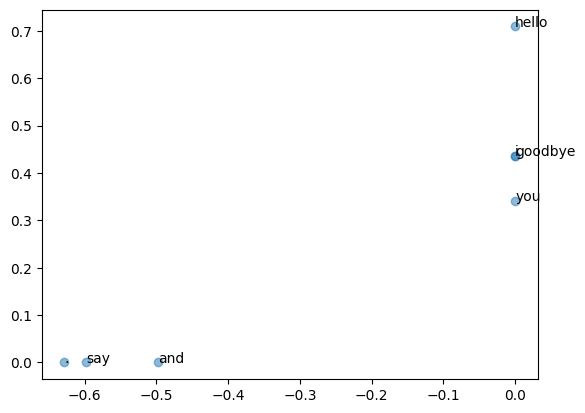

In [76]:
# 플롯
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

### 2.4.4 PTB 데이터셋

- **펜 트리뱅크**(PTB, Penn Treebank) 데이터셋이며, 
- PTB 말뭉치는 주어진 기법의 품질을 측정하는 벤치마크로 자주 이용된다.
- 기본적인 전처리 : 희소한 단어를 <unk> 라는 특수 문자로 치환, 구체적인 숫자는 'N'으로 치환

<img src = './deep_learning_2_images/fig 2-12.png' width=800>    
    
- 한 문장이 하나의 줄로 저장
- 각 문장을 연결한 '하나의 큰 시계열 데이터'로 취급
- 각 문장 끝에 <eos> 라는 특수 문자 삽입 (eos : end of sentence)
    - 이 책에서는 원리를 간략하게 설명하기 위해 여러 문장을 '하나의 큰 시계열 데이터'로 간주

In [78]:
# chap02/show_ptb.py
import sys
sys.path.append('..')
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train') # ptb 데이터 불러 오기, 인자 : train/test/valid

print('말뭉치 크기:', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

말뭉치 크기: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


### 2.4.5 PTB 데이터셋 평가

In [83]:
# chap02/count_method_big.py
import sys
sys.path.append('..')
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb

window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('Create Co-occurrence Matrix...')
C = create_co_matrix(corpus, vocab_size, window_size)

Create Co-occurrence Matrix...


In [84]:
len(C)

10000

In [82]:
print('PPMI 계산...')
W = ppmi(C, verbose=True)

PPMI 계산...
1.00 완료
2.00 완료
3.00 완료
4.00 완료
5.00 완료
6.00 완료
7.00 완료
8.00 완료
9.00 완료
10.00 완료
11.00 완료
12.00 완료
13.00 완료
14.00 완료
15.00 완료
16.00 완료
17.00 완료
18.00 완료
19.00 완료
20.00 완료
21.00 완료
22.00 완료
23.00 완료
24.00 완료
25.00 완료
26.00 완료
27.00 완료
28.00 완료
29.00 완료
30.00 완료
31.00 완료
32.00 완료
33.00 완료
34.00 완료
35.00 완료
36.00 완료
37.00 완료
38.00 완료
39.00 완료
40.00 완료
41.00 완료
42.00 완료
43.00 완료
44.00 완료
45.00 완료
46.00 완료
47.00 완료
48.00 완료
49.00 완료
50.00 완료
51.00 완료
52.00 완료
53.00 완료
54.00 완료
55.00 완료
56.00 완료
57.00 완료
58.00 완료
59.00 완료
60.00 완료
61.00 완료
62.00 완료
63.00 완료
64.00 완료
65.00 완료
66.00 완료
67.00 완료
68.00 완료
69.00 완료
70.00 완료
71.00 완료
72.00 완료
73.00 완료
74.00 완료
75.00 완료
76.00 완료
77.00 완료
78.00 완료
79.00 완료
80.00 완료
81.00 완료
82.00 완료
83.00 완료
84.00 완료
85.00 완료
86.00 완료
87.00 완료
88.00 완료
89.00 완료
90.00 완료
91.00 완료
92.00 완료
93.00 완료
94.00 완료
95.00 완료
96.00 완료
97.00 완료
98.00 완료
99.00 완료
100.00 완료


- Truncated SVD : 특잇값이 큰 것들만 계산하여 기본적인 SVD 보다 빠름

In [86]:
try:
    # truncated SVD
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                             random_state=None)
except:
    # SVD
    print('SVD')
    U, S, V = np.linalg.svd(W)

    
word_vecs = U[:, :wordvec_size]
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)


[query] you
 i: 0.6628978848457336
 we: 0.6499108672142029
 do: 0.5932766199111938
 somebody: 0.5142871737480164
 anybody: 0.4990827441215515

[query] year
 month: 0.6791229844093323
 earlier: 0.6250404715538025
 quarter: 0.6241698265075684
 june: 0.6084302663803101
 last: 0.5826308131217957

[query] car
 auto: 0.6239933371543884
 vehicle: 0.5838783383369446
 cars: 0.5275077223777771
 luxury: 0.5090105533599854
 truck: 0.4785071015357971

[query] toyota
 motor: 0.7454525828361511
 motors: 0.6537523865699768
 nissan: 0.6368467807769775
 honda: 0.616534411907196
 lexus: 0.575169026851654


#### 시각화 해보기

- t-SNE는 "t-Distributed Stochastic Neighbor Embedding"의 약자로, 고차원의 데이터를 시각화하기 위해 주로 사용되는 비선형 차원 축소 기법 중 하나입니다. 
- t-SNE는 주어진 데이터 포인트들의 유사도를 보존하면서 데이터를 저차원(주로 2차원 또는 3차원)으로 매핑하여 시각화하는 데에 쓰입니다.
- 기본 아이디어는 비슷한 데이터 포인트들을 저차원 상에서도 가깝게 유지하려는 것입니다. 
- 이를 위해 t-SNE는 먼저 고차원 데이터의 유사도를 측정하고, 이 유사도를 저차원에서의 유사도로 보존하려고 노력합니다. 
- 이때, t-SNE는 데이터 포인트 간의 거리를 측정하고 그 거리를 최대한 보존하면서 저차원으로 임베딩합니다.

- t-SNE는 시각적으로 비슷한 데이터 포인트들을 클러스터로 묶어 시각화할 때 매우 유용하며, 데이터의 구조와 패턴을 탐색하는 데 도움이 됩니다. 
- 하지만 t-SNE는 매번 실행할 때마다 결과가 다를 수 있으며, 특히 데이터의 크기와 설정에 따라 다른 결과를 얻을 수 있으므로 주의가 필요합니다.

In [87]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(U[1000:1100,:])

In [88]:
vocab = list(id_to_word.values())

In [89]:
df = pd.DataFrame(X_tsne, index=vocab[1000:1100], columns=['x', 'y'])
df.shape

(100, 2)

In [90]:
df.head(10)

,x,y
dec.,2.434157,1.060665
ruling,0.274658,-2.067251
slash,-0.176641,0.862947
earnings,-2.936646,-0.731293
spokesman,-1.080187,-1.253957
tracking,-0.580865,0.096292
whose,-1.361002,3.263811
addresses,-0.323104,0.765444
changed,1.321811,-0.093262
past,0.551606,2.645847


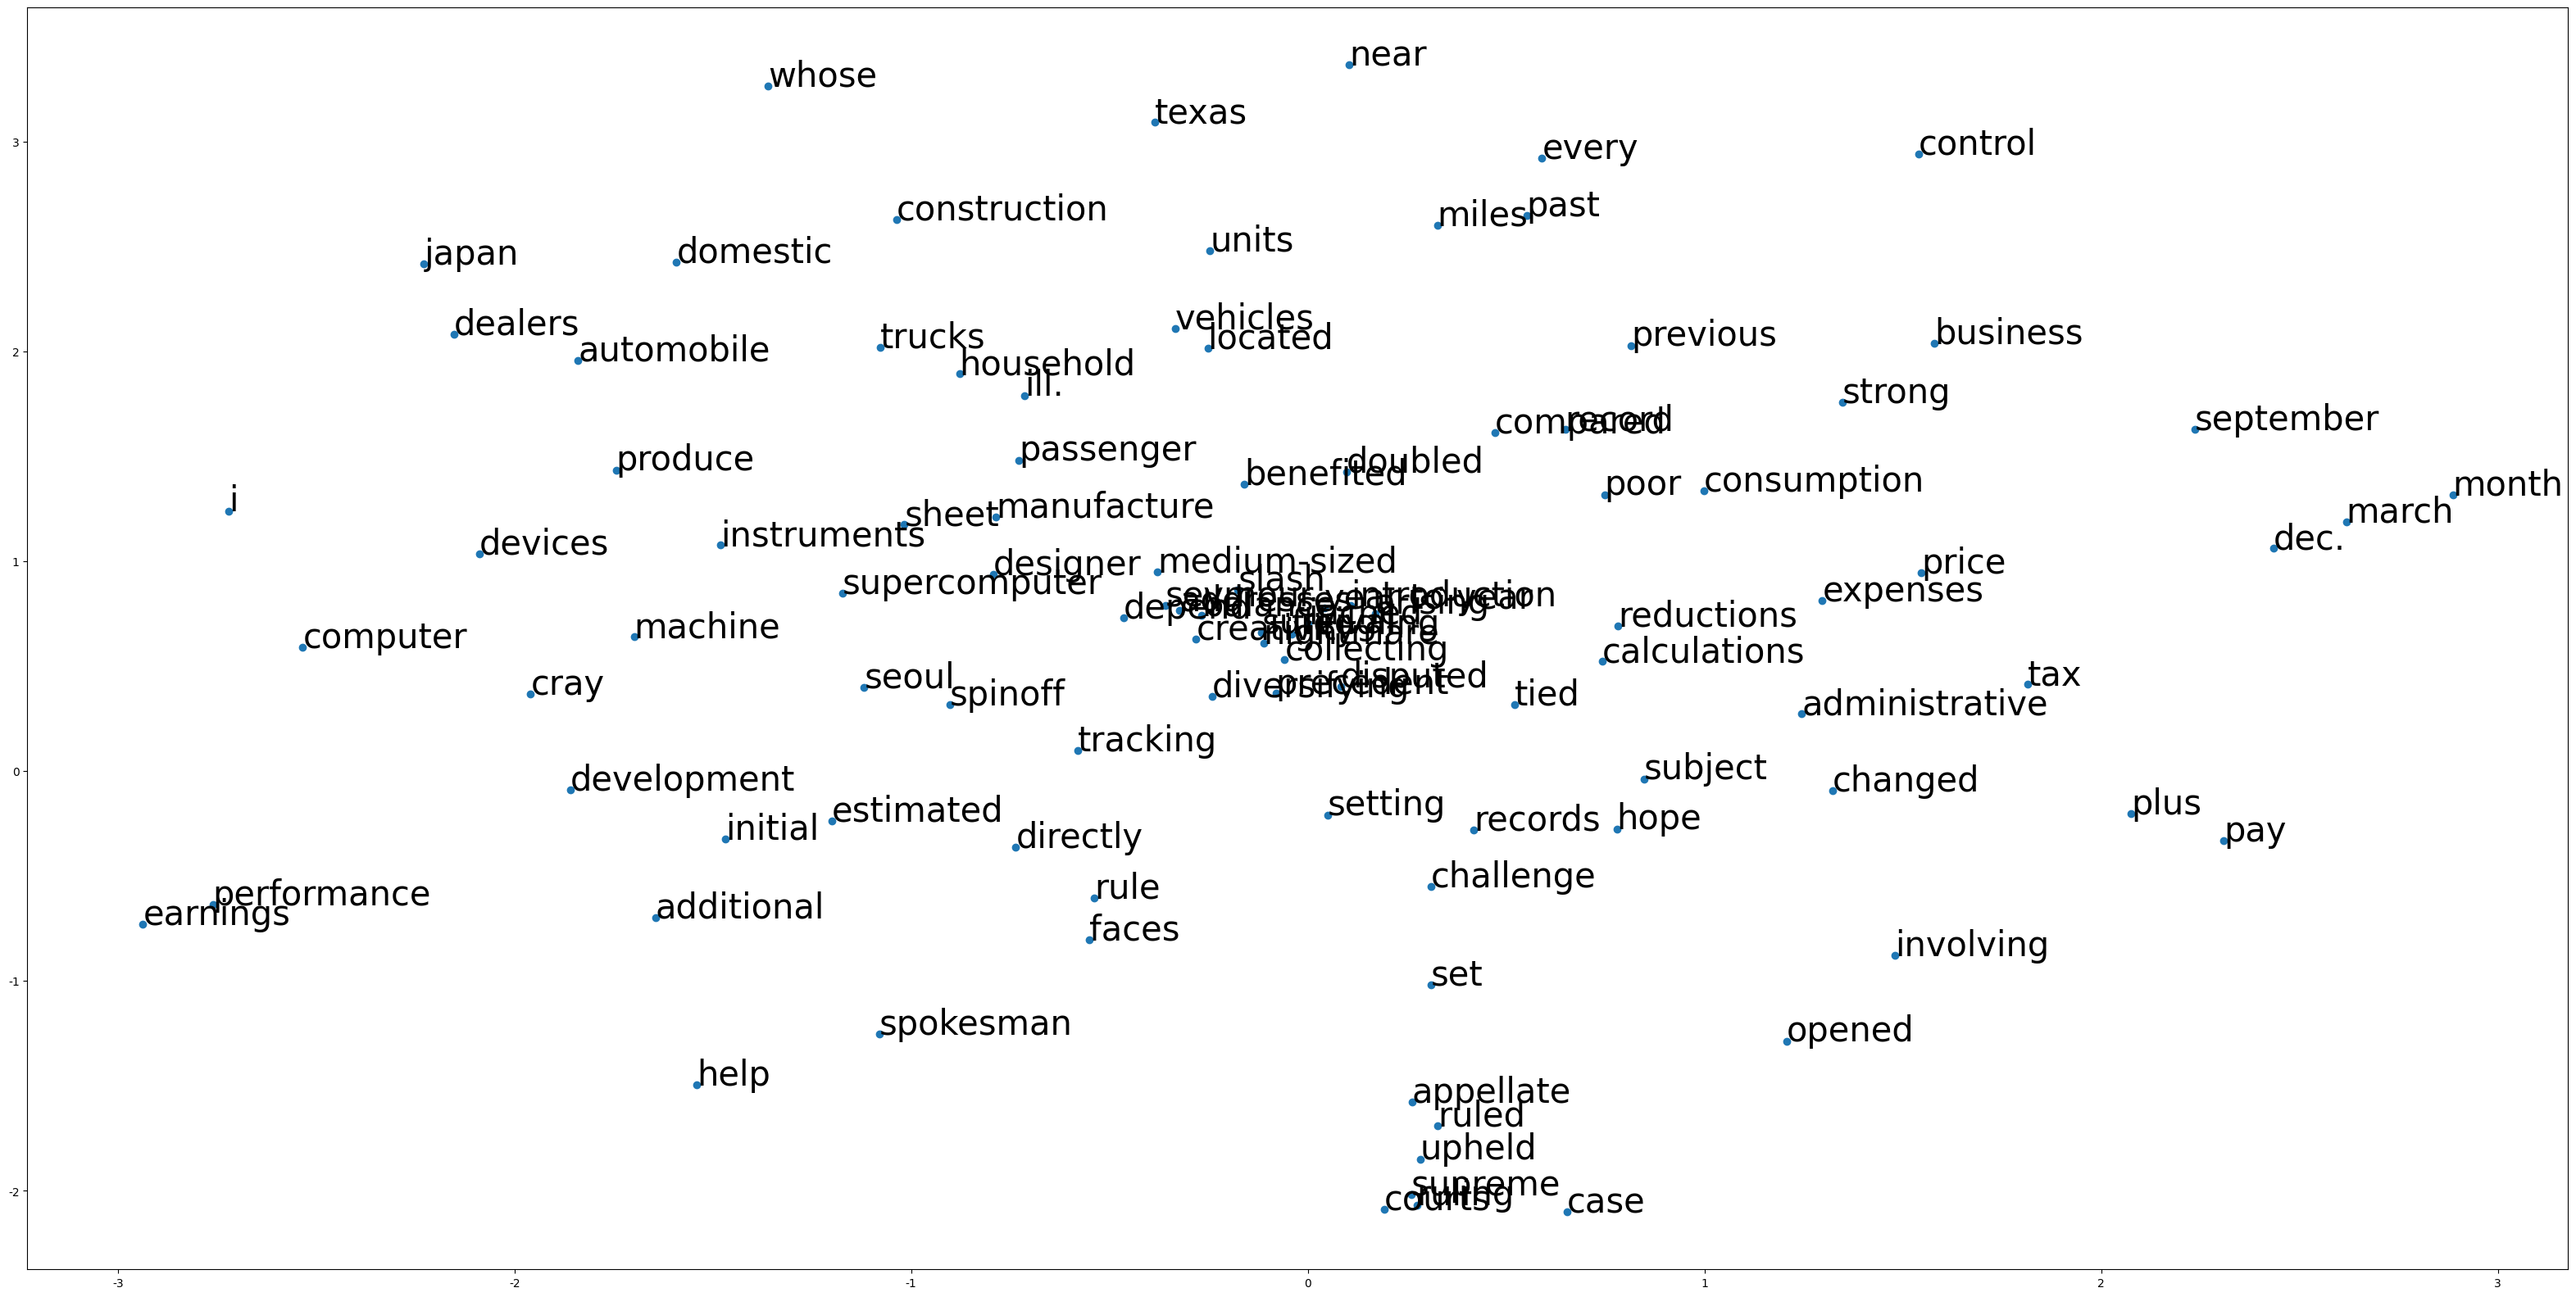

In [91]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

## 2.5 정리

- 시소러스 기반 기법은 시소러스를 작성하는 데 엄청난 인적 자원이 들고, 새로운 단어에 대응하기 어려운 문제가 있다.

- 현재는 말뭉치(corpus)를 이용해 단어를 벡터화하는 방식이 주로 사용된다.

- 최근의 단어 벡터화 기법들은 '단어의 의미는 주변 단어에 의해 형성된다'는 **분포 가설**에 기초한다.

- 통계 기반 기법은 말뭉치 안의 각 단어에 대해서 그 단어의 주변 단어의 빈도를 집계한다 -> Co-occurrence Matrix

- 동시발생 행렬을 PPMI 행렬로 변환하고 다시 차원을 축소(SVD)함으로써, '희소벡터'를 '밀집벡터'로 변환할 수 있다.

# 추가 자료

## 텍스트 분석의 이해 - NLP와 텍스트 분석

- NLP
    - Natual Language Processing
    - 인간의 언어를 이해하고 해석하는데 더 중점
- 텍스트 분석
    - 머신러닝, 언어 이해, 통계등을 활용 모델을 수립하고 정보를 추출
    - 비지니스 인텔리전스나 예측 분석등의 분석 작업 수행
    - 분류, 감정 분석, 요약, 군집화와 유사도 측정
    
<img src ='./deep_learning_2_images/fig_etc_2_1.png'>

## 텍스트 전처리 - 텍스트 정규화
- 클린징 : 텍스트 분석에 방해가 되는 불필요한 문자, 기호 사전 제거 (HTML, XML 테그 등)
- 토큰화 : 문장, 단어 토큰화, n-gram
- 필터링/스톱워드 제거/ 철자 수정 : 불필요한 단어나 분석에 의미가 없는 단어 (a, the, is, will 등), 잘못된 철자
- Stemming/Lemmatization : 어근 추출, 의미론 기반 단어 원형 추출
- n-gram : 문장을 개별 단어 별로 하나씩 토근화 하면 문맥이 무시됨, n개의 단어를 하나의 토큰 단위로 분리

### Text Tokenization
**문장 토큰화**

In [2]:
# !conda install -c anaconda nltk

In [4]:
from nltk import sent_tokenize
text_sample = 'The Matrix is everywhere its all around us, here even in this room.  \
              You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample) # 마침표로 구분
print(type(sentences),len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


**단어 토큰화**

In [5]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


**여러 문장들에 대한 단어 토큰화**

In [6]:
from nltk import word_tokenize, sent_tokenize

#여러개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화 만드는 함수 생성
def tokenize_text(text):
    
    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

#여러 문장들에 대해 문장별 단어 토큰화 수행. 
word_tokens = tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


**n-gram**

In [13]:
from nltk import ngrams

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)

all_ngrams = ngrams(words, 3)
ngrams = [ngram for ngram in all_ngrams]
print(ngrams)

[('The', 'Matrix', 'is'), ('Matrix', 'is', 'everywhere'), ('is', 'everywhere', 'its'), ('everywhere', 'its', 'all'), ('its', 'all', 'around'), ('all', 'around', 'us'), ('around', 'us', ','), ('us', ',', 'here'), (',', 'here', 'even'), ('here', 'even', 'in'), ('even', 'in', 'this'), ('in', 'this', 'room'), ('this', 'room', '.')]


### Stopwords 제거

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/restful3/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
print('영어 stop words 갯수:',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:40])

영어 stop words 갯수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this']


In [10]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제의 3개의 문장별로 얻은 word_tokens list 에 대해 stop word 제거 Loop
for sentence in word_tokens:
    filtered_words=[]
    # 개별 문장별로 tokenize된 sentence list에 대해 stop word 제거 Loop
    for word in sentence:
        #소문자로 모두 변환합니다. 
        word = word.lower()
        # tokenize 된 개별 word가 stop words 들의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
    
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


### Stemming과 Lemmatization

In [14]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [18]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

print(lemma.lemmatize('working','v'),lemma.lemmatize('works','v'),lemma.lemmatize('worked','v'))
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

work work work
amuse amuse amuse
happy happy
fancy fancy


<img src ='./deep_learning_2_images/fig_etc_2_2.png'>

### Bag of Words – BOW
- 문서가 가지고 있는 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여 
- 문서 내 모든 단어를 한꺼번에 봉투(bag)안에 넣고 흔들어 섞는다는 의미
- 장점 : 쉽고 빠른 구축, 예상보다 문서의 특징을 잘 나타냄
- 단점 : 문맥 의미 반영 문제, 희소 행렬 문제

#### BOW 피처 벡터화 유형
- 단순 카운트 기반 벡터화
    - 각 문서에서 해당 단어가 나타나는 횟수
- TF-IDF 벡터화
    - Term Frequency Inverse Document Frequency
    - 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되 (TF)
    - 모든 문서에서 전반적으로 자주 나타나는(DF) 단어에 대해서는 페널티(IDF) 부여 
    - IDF : Inverse Document Frequency : DF 의 약수, 전체 문서수/DF

**사이킷런 CountVectorizer**
- 기능
    - 사전 데이터 가공 : 소문자 변환
    - 토큰화 : n_gram_range 
    - 텍스트 정규화 : stop words 제거 제공 (Stemmer, Lemmatize 제공 하지 않음)
    - 피처 벡터화 : csr 희소행렬로 변형
- 초기 파라미터
    - max_df : 전체 문서에 걸쳐서 너무 높은 빈도를 가지는 단어 피처를 제외 하기 위한 파라미터
        - max_df = 100, 전체 문서에 걸쳐 100개 이하로 나타나는 단어만 피처로 추출
    - min_df : 전체 문서에 걸쳐 너무 낮은 빈도를 가지는 단어 피처 제외 하기 위한 파라미터
        - min_df = 2, 전체 문서에 걸쳐 2번 이하로 나타나는 단어는 추출하지 않는다
    - max_features : 피처로 추출하는 피처의 개수를 제한하며 정수로 값을 지정 
        - max_features = 2000, 가장 높은 빈도를 가지는 단어 순으로 정렬하여 2000개만 
    - stop_words : 'english' 로 지정하면 stop words 제외하여 추출
    - ngram_range : (범위 최솟값, 범위 최댓값), (1, 2) 로 설정하면, 토큰화된 단어를 1개씩, 순서대로 2개씩 묶어 피처로 추출
    - analyzer : 피처 추출을 수행한 단위, 'word', 'character'
    - token_pattern : 토큰화를 수행하는 정규 표현식 패턴
    - lower_case : 소문자 변형, 기본 True

In [21]:
text_sample_01 = 'The Matrix is everywhere its all around us, here even in this room. \
                  You can see it out your window or on your television. \
                  You feel it when you go to work, or go to church or pay your taxes.'
text_sample_02 = 'You take the blue pill and the story ends.  You wake in your bed and you believe whatever you want to believe\
                  You take the red pill and you stay in Wonderland and I show you how deep the rabbit-hole goes.'
text=[]
text.append(text_sample_01)
text.append(text_sample_02)
print(text,"\n", len(text))

['The Matrix is everywhere its all around us, here even in this room.                   You can see it out your window or on your television.                   You feel it when you go to work, or go to church or pay your taxes.', 'You take the blue pill and the story ends.  You wake in your bed and you believe whatever you want to believe                  You take the red pill and you stay in Wonderland and I show you how deep the rabbit-hole goes.'] 
 2


**CountVectorizer객체 생성 후 fit(), transform()으로 텍스트에 대한 feature vectorization 수행**

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorization으로 feature extraction 변환 수행. 
cnt_vect = CountVectorizer()
cnt_vect.fit(text)

CountVectorizer()

In [23]:
ftr_vect = cnt_vect.transform(text)

**피처 벡터화 후 데이터 유형 및 여러 속성 확인**

In [25]:
print(type(ftr_vect), ftr_vect.shape)

<class 'scipy.sparse._csr.csr_matrix'> (2, 51)


In [26]:
print(ftr_vect) # (다큐먼트 번호, 피처 번호) 갯수

  (0, 0)	1
  (0, 2)	1
  (0, 6)	1
  (0, 7)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	2
  (0, 15)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	2
  (0, 21)	1
  (0, 22)	1
  (0, 23)	1
  (0, 24)	3
  (0, 25)	1
  (0, 26)	1
  (0, 30)	1
  (0, 31)	1
  (0, 36)	1
  (0, 37)	1
  (0, 38)	1
  (0, 39)	1
  (0, 40)	2
  :	:
  (1, 1)	4
  (1, 3)	1
  (1, 4)	2
  (1, 5)	1
  (1, 8)	1
  (1, 9)	1
  (1, 14)	1
  (1, 16)	1
  (1, 17)	1
  (1, 18)	2
  (1, 27)	2
  (1, 28)	1
  (1, 29)	1
  (1, 32)	1
  (1, 33)	1
  (1, 34)	1
  (1, 35)	2
  (1, 38)	4
  (1, 40)	1
  (1, 42)	1
  (1, 43)	1
  (1, 44)	1
  (1, 47)	1
  (1, 49)	7
  (1, 50)	1


In [27]:
print(cnt_vect.vocabulary_) # 각 단어별 index

{'the': 38, 'matrix': 22, 'is': 19, 'everywhere': 11, 'its': 21, 'all': 0, 'around': 2, 'us': 41, 'here': 15, 'even': 10, 'in': 18, 'this': 39, 'room': 30, 'you': 49, 'can': 6, 'see': 31, 'it': 20, 'out': 25, 'your': 50, 'window': 46, 'or': 24, 'on': 23, 'television': 37, 'feel': 12, 'when': 45, 'go': 13, 'to': 40, 'work': 48, 'church': 7, 'pay': 26, 'taxes': 36, 'take': 35, 'blue': 5, 'pill': 27, 'and': 1, 'story': 34, 'ends': 9, 'wake': 42, 'bed': 3, 'believe': 4, 'whatever': 44, 'want': 43, 'red': 29, 'stay': 33, 'wonderland': 47, 'show': 32, 'how': 17, 'deep': 8, 'rabbit': 28, 'hole': 16, 'goes': 14}


In [39]:
cnt_vect = CountVectorizer(max_features=5, stop_words='english') # 상위 5개 
cnt_vect.fit(text)
ftr_vect = cnt_vect.transform(text)
print(type(ftr_vect), ftr_vect.shape)

<class 'scipy.sparse._csr.csr_matrix'> (2, 5)


In [40]:
print(ftr_vect)

  (0, 4)	1
  (1, 0)	2
  (1, 1)	2
  (1, 2)	1
  (1, 3)	1


In [41]:
print(cnt_vect.vocabulary_)

{'window': 4, 'pill': 1, 'wake': 2, 'believe': 0, 'want': 3}


**ngram_range 확인**

In [45]:
cnt_vect = CountVectorizer(ngram_range=(1,3)) # (1,2). (1. 3) (2,2) 의 결과 비교
cnt_vect.fit(text)
ftr_vect = cnt_vect.transform(text)
print(type(ftr_vect), ftr_vect.shape)

<class 'scipy.sparse._csr.csr_matrix'> (2, 201)


In [46]:
print(ftr_vect)

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 25)	1
  (0, 26)	1
  (0, 27)	1
  (0, 28)	1
  (0, 29)	1
  (0, 30)	1
  (0, 37)	1
  (0, 38)	1
  (0, 39)	1
  (0, 40)	1
  (0, 41)	1
  (0, 42)	1
  (0, 43)	1
  (0, 44)	1
  (0, 45)	1
  (0, 46)	2
  (0, 47)	2
  (0, 48)	1
  (0, 49)	1
  :	:
  (1, 156)	1
  (1, 157)	1
  (1, 158)	1
  (1, 159)	1
  (1, 160)	1
  (1, 161)	1
  (1, 168)	1
  (1, 169)	1
  (1, 170)	1
  (1, 174)	7
  (1, 175)	1
  (1, 176)	1
  (1, 183)	1
  (1, 184)	1
  (1, 185)	1
  (1, 186)	1
  (1, 187)	2
  (1, 188)	2
  (1, 189)	1
  (1, 190)	1
  (1, 191)	1
  (1, 192)	1
  (1, 193)	1
  (1, 194)	1
  (1, 195)	1


In [47]:
print(cnt_vect.vocabulary_)

{'the': 129, 'matrix': 77, 'is': 66, 'everywhere': 40, 'its': 74, 'all': 0, 'around': 11, 'us': 150, 'here': 51, 'even': 37, 'in': 59, 'this': 140, 'room': 106, 'you': 174, 'can': 25, 'see': 109, 'it': 69, 'out': 90, 'your': 193, 'window': 165, 'or': 83, 'on': 80, 'television': 126, 'feel': 43, 'when': 162, 'go': 46, 'to': 143, 'work': 171, 'church': 28, 'pay': 93, 'taxes': 125, 'the matrix': 132, 'matrix is': 78, 'is everywhere': 67, 'everywhere its': 41, 'its all': 75, 'all around': 1, 'around us': 12, 'us here': 151, 'here even': 52, 'even in': 38, 'in this': 60, 'this room': 141, 'room you': 107, 'you can': 177, 'can see': 26, 'see it': 110, 'it out': 70, 'out your': 91, 'your window': 199, 'window or': 166, 'or on': 86, 'on your': 81, 'your television': 197, 'television you': 127, 'you feel': 179, 'feel it': 44, 'it when': 72, 'when you': 163, 'you go': 181, 'go to': 47, 'to work': 148, 'work or': 172, 'or go': 84, 'to church': 146, 'church or': 29, 'or pay': 88, 'pay your': 94, '

## 희소 행렬 
- BOW의 Vectorization 모델은 너무 많은 0 값이 메모리 공간에 할당
- 희소 행렬 저장 변환 방식
    - COO형식 : 좌표(Coordinate) 방식 의미, 0이 아닌 데이터만 별도의 배열에 저장, 그 데이터를 가리키는 행과 열의 위치를 별도의 배열로 저장
    - CSR형식 : COO형식이 위치 배열값을 중복적으로 가지는 문제를 해결한 방식, CSR 방식이 일반적
    - scipy의 coo_matrix(), csr_matrix() 함수 사용

### COO 형식

<img src ='./deep_learning_2_images/fig_etc_2_3.png'>

In [48]:
import numpy as np

dense = np.array( [ [ 3, 0, 1 ], 
                    [0, 2, 0 ] ] )

In [49]:
from scipy import sparse

# 0 이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용하여 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos,col_pos)))

In [52]:
print(type(sparse_coo))
print(sparse_coo)

<class 'scipy.sparse._coo.coo_matrix'>
  (0, 0)	3
  (0, 2)	1
  (1, 1)	2


In [53]:
dense01=sparse_coo.toarray()
print(type(dense01),"\n", dense01)

<class 'numpy.ndarray'> 
 [[3 0 1]
 [0 2 0]]


### CSR 형식

<img src ='./deep_learning_2_images/fig_etc_2_4.png'>

In [35]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

# 0 이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환 
sparse_coo = sparse.coo_matrix((data2, (row_pos,col_pos)))

# 행 위치 배열의 고유한 값들의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환 
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [36]:
print(sparse_csr)

  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1


In [37]:
dense3 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

## 텍스트 분류 실습
### 20 뉴스그룹 분류
- 18846개 뉴스 문서를 20개의 뉴스 그룹 카테고리로 분류

**데이터 로딩과 데이터 구성 확인**
- subset 으로 학습과 테스트용 데이터셋을 가지고 올 수 있음
- return 값은 Bunch

In [1]:
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset='all',random_state=156) 

In [2]:
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [3]:
import pandas as pd

print('target 클래스의 값과 분포도 \n',pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들 \n',news_data.target_names)
len(news_data.target_names), pd.Series(news_data.target).shape

target 클래스의 값과 분포도 
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64
target 클래스의 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


(20, (18846,))

In [4]:
print(news_data.data[0])

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:
> 
> The question for the day is re: passenger helmets, if you don't know for 
>certain who's gonna ride with you (like say you meet them at a .... church 
>meeting, yeah, that's the ticket)... What are some guidelines? Should I just 
>pick up another shoei in my size to have a backup helmet (XL), or should I 
>maybe get an inexpensive one of a smaller size to accomodate my likely 
>passenger? 

If your primary concern is protecting the passenger in the event of a
crash, have him or her fitted for a helmet that is their size.  If your
primary concern is complying with stupid helmet laws, carry a real big
spare (you can put a big or small head in a big helmet, bu

**학습과 테스트용 데이터 생성**

In [5]:
from sklearn.datasets import fetch_20newsgroups

# subset='train'으로 학습용(Train) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
# remove를 하는 이유는, 너무 쉽게 주제를 알 수 있어서, 본문 내용만 넣고 학습 할 수 있게 하기 위해 서임.
train_news= fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=156)
X_train = train_news.data
y_train = train_news.target
print(type(X_train))

# subset='test'으로 테스트(Test) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
test_news= fetch_20newsgroups(subset='test',remove=('headers', 'footers','quotes'),random_state=156)
X_test = test_news.data
y_test = test_news.target
print('학습 데이터 크기 {0} , 테스트 데이터 크기 {1}'.format(len(train_news.data) , len(test_news.data)))

<class 'list'>
학습 데이터 크기 11314 , 테스트 데이터 크기 7532


**피처 벡터화 변환과 머신러닝 모델 학습/예측/평가**

*주의: 학습 데이터에 대해 fit( )된 CountVectorizer를 이용해서 테스트 데이터를 피처 벡터화 해야함.*
-  테스트 데이터에서 다시 CountVectorizer의 fit_transform()을 수행하거나 fit()을 수행 하면 안됨.
- 이는 이렇게 테스트 데이터에서 fit()을 수행하게 되면 기존 학습된 모델에서 가지는 feature의 갯수가 달라지기 때문임.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorization으로 feature extraction 변환 수행. 
cnt_vect = CountVectorizer()
cnt_vect.fit(X_train)
X_train_cnt_vect = cnt_vect.transform(X_train)

# 학습 데이터로 fit( )된 CountVectorizer를 이용하여 테스트 데이터를 feature extraction 변환 수행. 
X_test_cnt_vect = cnt_vect.transform(X_test)

# X_train.shape[1]과 X_test.shape[1]는 같아야 한다.
print('학습 데이터 Text의 CountVectorizer Shape:',X_train_cnt_vect.shape, X_test_cnt_vect.shape)

학습 데이터 Text의 CountVectorizer Shape: (11314, 101631) (7532, 101631)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# LogisticRegression을 이용하여 학습/예측/평가 수행. 
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_cnt_vect , y_train)
pred = lr_clf.predict(X_test_cnt_vect)
print('CountVectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

CountVectorized Logistic Regression 의 예측 정확도는 0.607


/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**TF-IDF 피처 변환과 머신러닝 학습/예측/평가**

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization 적용하여 학습 데이터셋과 테스트 데이터 셋 변환. 
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

# LogisticRegression을 이용하여 학습/예측/평가 수행. 
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

TF-IDF Logistic Regression 의 예측 정확도는 0.678


In [13]:
X_train_tfidf_vect.shape

(11314, 101631)

**stop words 필터링을 추가하고 ngram을 기본(1,1)에서 (1,2)로 변경하여 피처 벡터화**

In [14]:
# stop words 필터링을 추가하고 ngram을 기본(1,1)에서 (1,2)로 변경하여 Feature Vectorization 적용.
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300 )
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

TF-IDF Vectorized Logistic Regression 의 예측 정확도는 0.690


In [15]:
X_train_tfidf_vect.shape

(11314, 943453)

**GridSearchCV로 LogisticRegression C 하이퍼 파라미터 튜닝**
- C : 회귀 계수의 규제
    - alpha의 역수, 클 수록 큰 규제
    - C가 커질 수록 규제가 약해 짐

In [16]:
from sklearn.model_selection import GridSearchCV

# 최적 C 값 도출 튜닝 수행. CV는 3 Fold셋으로 설정.  15번, 시간 오래 걸림
params = { 'C':[0.01, 0.1, 1, 5, 10]}
lr_clf = LogisticRegression(solver='liblinear')
grid_cv_lr = GridSearchCV(lr_clf ,param_grid=params , cv=3 , scoring='accuracy' , verbose=1 )
grid_cv_lr.fit(X_train_tfidf_vect , y_train)
print('Logistic Regression best C parameter :',grid_cv_lr.best_params_ )

# 최적 C 값으로 학습된 grid_cv로 예측 수행하고 정확도 평가. 
pred = grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Logistic Regression best C parameter : {'C': 10}
TF-IDF Vectorized Logistic Regression 의 예측 정확도는 0.704


### 사이킷런 파이프라인(Pipeline) 사용 및 GridSearchCV와의 결합

In [18]:
from sklearn.pipeline import Pipeline

# TfidfVectorizer 객체를 tfidf_vect 객체명으로, LogisticRegression객체를 lr_clf 객체명으로 생성하는 Pipeline생성
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)),
    ('lr_clf', LogisticRegression(solver='liblinear', C=10))
])

# 별도의 TfidfVectorizer객체의 fit_transform( )과 LogisticRegression의 fit(), predict( )가 필요 없음. 
# pipeline의 fit( ) 과 predict( ) 만으로 한꺼번에 Feature Vectorization과 ML 학습/예측이 가능. 
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

Pipeline을 통한 Logistic Regression 의 예측 정확도는 0.704


In [19]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression(solver='liblinear'))
])

# Pipeline에 기술된 각각의 객체 변수에 언더바(_)2개를 연달아 붙여 GridSearchCV에 사용될 
# 파라미터/하이퍼 파라미터 이름과 값을 설정. . 
params = { 'tfidf_vect__ngram_range': [(1,1), (1,2), (1,3)],
           'tfidf_vect__max_df': [100, 300, 700],
           'lr_clf__C': [1,5,10]
}

# GridSearchCV의 생성자에 Estimator가 아닌 Pipeline 객체 입력
grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_pipe.fit(X_train , y_train)
print(grid_cv_pipe.best_params_ , grid_cv_pipe.best_score_)

pred = grid_cv_pipe.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'lr_clf__C': 10, 'tfidf_vect__max_df': 700, 'tfidf_vect__ngram_range': (1, 2)} 0.7550828826229531
Pipeline을 통한 Logistic Regression 의 예측 정확도는 0.702
